# Deep Learning in Time Series Forecasting
<br>
Eric B. Guevarra

# Table of Contents

- What are CNN's?
- CNN 2D Implementation
- CNN 1D Implementation
- Summary

## Convolutional Neural Networks(CNN)
<br>

### What is CNN?

- Deep learning Neural Network that was explicitly developed to process picture input effectively.
- CNN process raw data directly such as raw pixel values, rather than domain-specific or constructed characteristics generated from raw data.
- The model then learn how to extract automatically from the raw data the features that are directly relevant to the issue at hand.
- Convolution are specialized kind of linear operation

#### CNN Building Blocks

- Tensor: n-dimensional matrix

![Tensor](tensor.png)

- Neuron: function that takes in multiple inputs and yields a single output
- Layer: collection of neurons with the same operations
- Kernel weights and biases
- Class scores


### Convolutional Neural Network Architecture

A CNN typically has three layers: a convolutional layer, a pooling layer and a fully connected layer

![Tensor](CNN_Architecture.png)

#### Input Layer

- Input image into the CNN

#### Convolution Layer

- Core building block of CNN, it carries the main portion of the network's computational load
- First layer to extract features from an input image

#### Pooling Layer

- Would reduce the number of parameters when the images are too large.
- Spatial pooling reduces the dimension of each map but retains important information.

#### Fully Connected Layer

- Further refines learned features from convolution layers

# Current Research - Trading via Image Classification

## Introduction

### Forex Trading
- Forex represent the biggest trading volume and the largest asset class in the world leading to high liquidit and volatility
- Forex volumes averages around $6.6 trillion daily in both spot and derivatives market
- Forex is traded 24/5 globally
- Leverage plays a crucial role to enhance profit and loss margins with respect to account size
- Relies heavily on technical analysis and fundamentals for specific dates (NFP, interest rates, etc)

### Technical Analysis
- Means of examining and predicting price movements in the financial markets, by using historical price charts and market statistics.
- Based on the idea that if a trader can identify previous market patterns, they can form an accurate prediction of future price trajectories

### Significance
- AI is shaping the future of forex, it is being used as robo-advisers that analyze millions of data points and execute trades at the optimal price
- Forecast markets with greater accuracy
- Removes human emotions in trading

![Tensor](AvaTrade2.png)

Automated Trading by classifying trade patterns - using images I have trained several machine learning classification models and  figure out a vision solution to a continious numberic time-series classification problem. 

#### The Big Short

When experienced traders look at trading patterns they rely on systematic set of rules, this research would like to build a system that identifies and replicate the way humans trade.
We make use of several trading strategies and using CNN try to evaluate the performance of the predictions.

#### Which Signals to Interpret

- EMA and MA cross
- Bollinger Bands
- Moving Average Convergence Divergence(MACD)
- Relative Strength Index(RSI) Crossing







### Methodology 1 - EMA and MA Cross
- Chart Pattern Dataset
- Collected from MT4
- Based on EURUSD at 15 minutes candlestick
- 500 images with two labels – (1) Buy and (2) Sell signals

### Architecture (Simple CNN)

Buy
![Tensor](CNN_Architecture2.png)
                        Sell



In [2]:
import tensorflow as tf
print(tf.__version__)

import os

2022-12-04 09:18:53.888509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


In [104]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [105]:
filepath = os.path.join(os.path.expanduser("~"), "Documents/CNN/buy_sell/")

Image shape: (94, 104, 3)


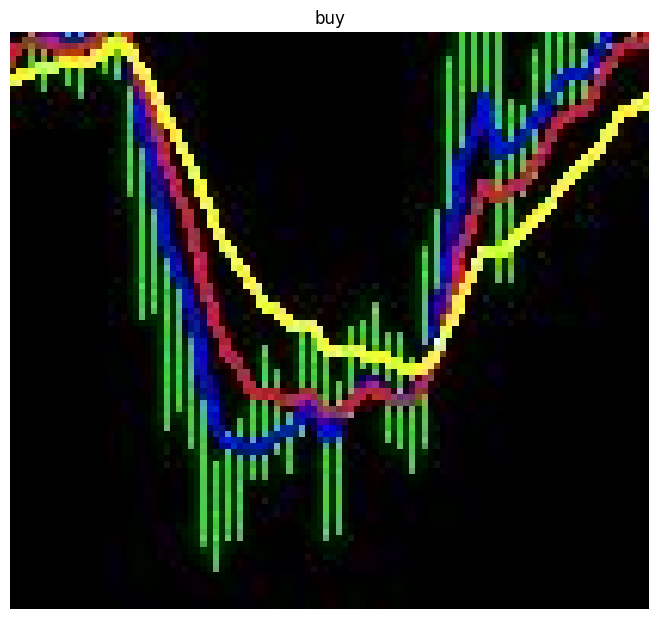

In [106]:
# View a random image from the training dataset
img = view_random_image(target_dir=filepath+"/train/",
                        target_class="buy")

In [107]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = filepath+"/train/"
test_dir = filepath+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary")

test_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary")
                                               


# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 368 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Epoch 1/5
12/12 [==============================] - 8s 585ms/step - loss: 0.2366 - accuracy: 0.9076 - val_loss: 6.4683e-04 - val_accuracy: 1.0000
Epoch 2/5
12/12 [==============================] - 7s 569ms/step - loss: 1.1402e-04 - accuracy: 1.0000 - val_loss: 3.8816e-08 - val_accuracy: 1.0000
Epoch 3/5
12/12 [==============================] - 7s 580ms/step - loss: 7.3260e-09 - accuracy: 1.0000 - val_loss: 3.4008e-10 - val_accuracy: 1.0000
Epoch 4/5
12/12 [==============================] - 7s 574ms/step - loss: 2.2944e-10 - accuracy: 1.0000 - val_loss: 5.8613e-11 - val_accuracy: 1.0000
Epoch 5/5
12/12 [==============================] - 7s 593ms/step - loss: 6.9358e-11 - accuracy: 1.0000 - val_loss: 3.2674e-11 - val_accuracy: 1.0000


In [108]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [109]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(12, 5)

In [111]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

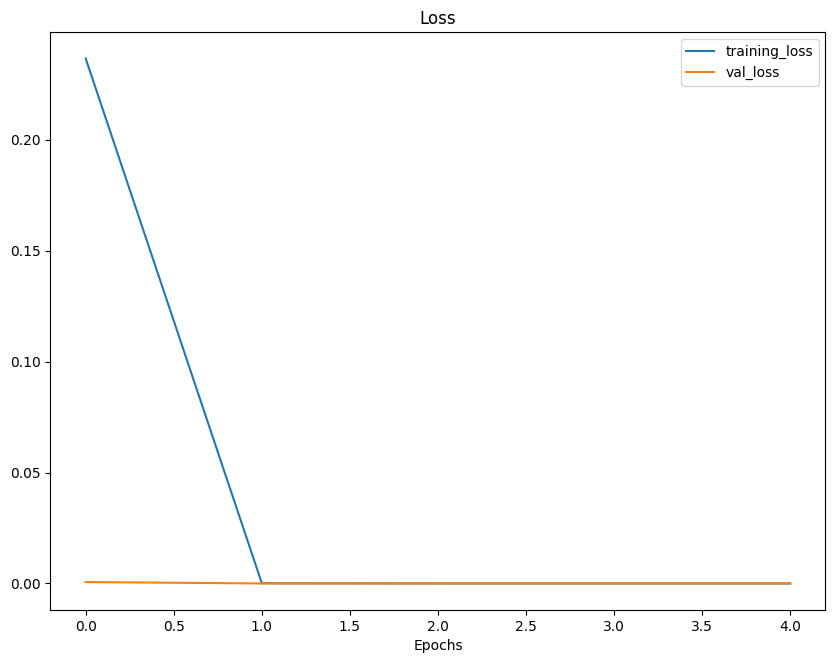

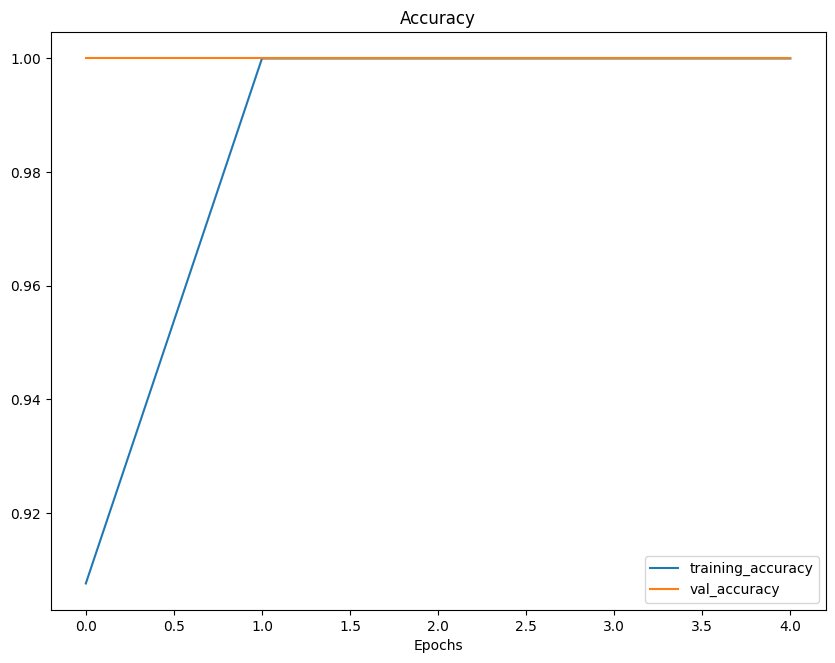

In [112]:
# Check out the loss curves of model_4
plot_loss_curves(history_1)

In [308]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [324]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path(filepath+"/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names = np.delete(class_names,0)
print(class_names)

['buy' 'sell']


In [325]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

1/1 [==============================] - 0s 28ms/step


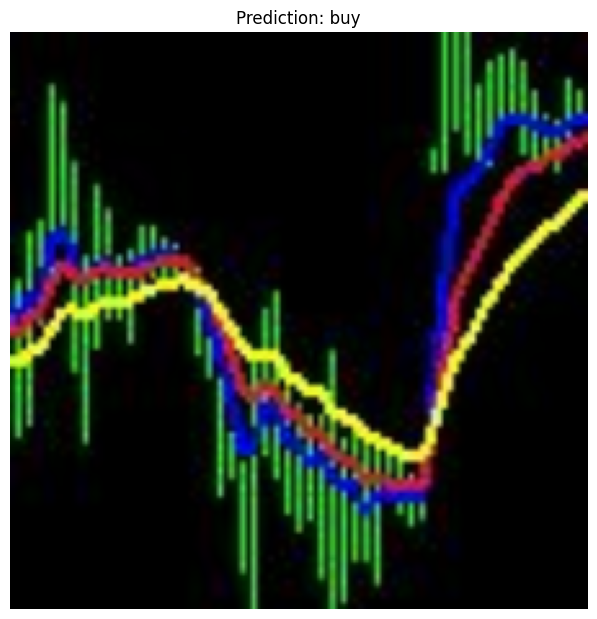

In [326]:
# Test our model on a custom image
pred_and_plot(model_1, filepath+"pred.jpg", class_names)

1/1 [==============================] - 0s 26ms/step


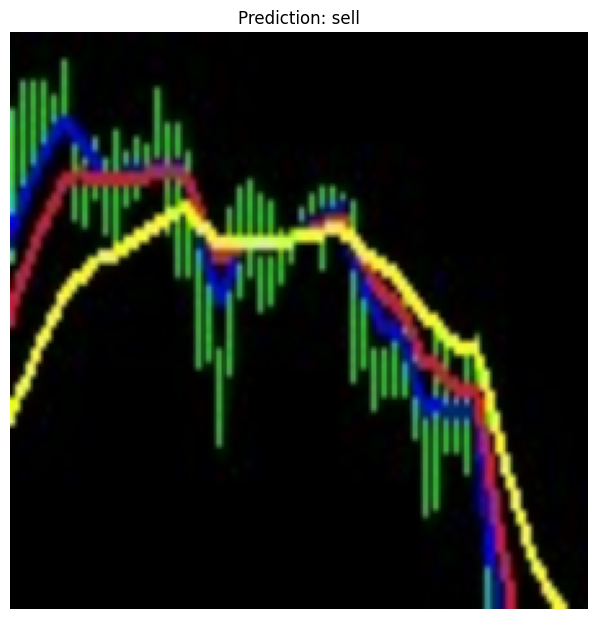

In [327]:
# Test our model on a custom image
pred_and_plot(model_1, filepath+"pred2.jpg", class_names)

# CNN Time Series

## One Dimensional CNN (CONV1D)

 A 1D CNN is very effective when you expect to derive interesting features from shorter (fixed-length) segments of the overall data set and where the location of the feature within the segment is not of high relevance.
<br>
For forecasting the Forex time series, we made a 1D CNN model. In a one-dimensional CNN, the kernel travels in a single direction.

![Tensor](CNN_CONV1D.png)

In [5]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials

from itertools import product

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [253]:
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rcParams['axes.grid'] = False

In [6]:
from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

In [255]:
print(tf.__version__)

2.10.0


In [256]:
tf.random.set_seed(51)
np.random.seed(51)

## EUR/USD Dataset

In [257]:
df = yf.download('EURUSD=X', 
                      start='2021-01-01', 
                      end='2022-10-11', 
                      interval = '1h',
                      progress=False)

df['Price'] = df.loc[:, 'Adj Close']

df_orig = df


df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Price
2021-01-04 00:00:00+00:00,1.225190,1.225640,1.224440,1.224440,1.224440,0,1.224440
2021-01-04 01:00:00+00:00,1.224590,1.225941,1.224440,1.225640,1.225640,0,1.225640
2021-01-04 02:00:00+00:00,1.225640,1.226392,1.225340,1.225941,1.225941,0,1.225941
2021-01-04 03:00:00+00:00,1.226091,1.226392,1.225340,1.225791,1.225791,0,1.225791
2021-01-04 04:00:00+00:00,1.225640,1.226091,1.224890,1.225190,1.225190,0,1.225190
2021-01-04 05:00:00+00:00,1.225640,1.226242,1.224590,1.225941,1.225941,0,1.225941
2021-01-04 06:00:00+00:00,1.225791,1.226242,1.224740,1.226242,1.226242,0,1.226242
2021-01-04 07:00:00+00:00,1.225941,1.227446,1.225941,1.226843,1.226843,0,1.226843
2021-01-04 08:00:00+00:00,1.226843,1.229105,1.226843,1.228652,1.228652,0,1.228652
2021-01-04 09:00:00+00:00,1.228501,1.230769,1.228350,1.230012,1.230012,0,1.230012


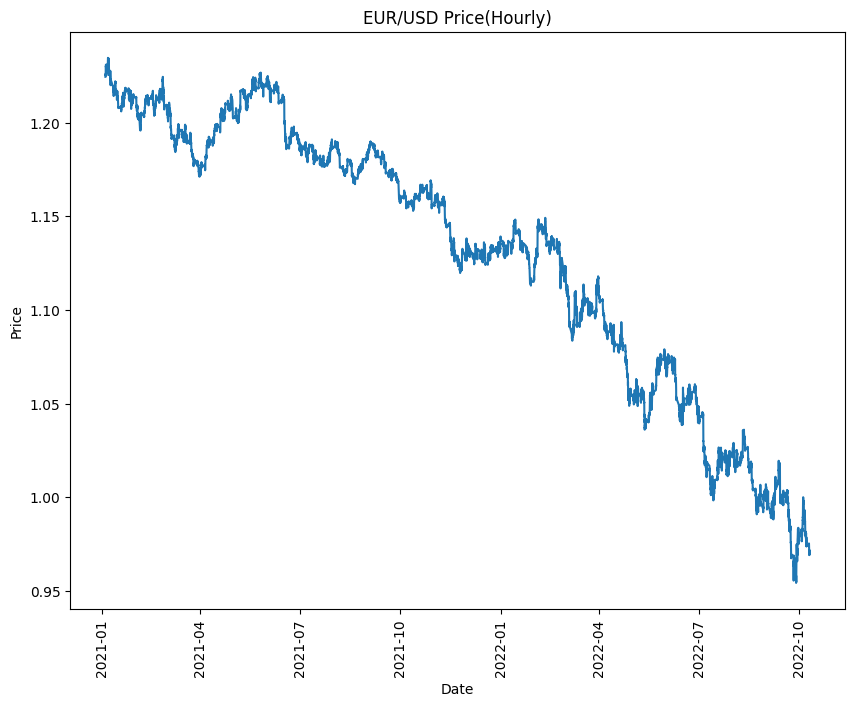

In [258]:
plt.plot(df.index, df['Close'])
plt.title('EUR/USD Price(Hourly)')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=90)

plt.show()

In [259]:
df_orig = df_orig.loc[:,['Price','High', 'Low','Close']]             

df_orig


,Price,High,Low,Close
2021-01-04 00:00:00+00:00,1.224440,1.225640,1.224440,1.224440
2021-01-04 01:00:00+00:00,1.225640,1.225941,1.224440,1.225640
2021-01-04 02:00:00+00:00,1.225941,1.226392,1.225340,1.225941
2021-01-04 03:00:00+00:00,1.225791,1.226392,1.225340,1.225791
2021-01-04 04:00:00+00:00,1.225190,1.226091,1.224890,1.225190
...,...,...,...,...
2022-10-10 19:00:00+01:00,0.970591,0.972479,0.970591,0.970591
2022-10-10 20:00:00+01:00,0.970403,0.971062,0.970403,0.970403
2022-10-10 21:00:00+01:00,0.970591,0.971157,0.970591,0.970591
2022-10-10 22:00:00+01:00,0.970685,0.970968,0.969838,0.970685


In [260]:
df['Date'] = df.index.strftime('%Y.%m.%d %H:%M:%S')

df

,Open,High,Low,Close,Adj Close,Volume,Price,Date
2021-01-04 00:00:00+00:00,1.225190,1.225640,1.224440,1.224440,1.224440,0,1.224440,2021.01.04 00:00:00
2021-01-04 01:00:00+00:00,1.224590,1.225941,1.224440,1.225640,1.225640,0,1.225640,2021.01.04 01:00:00
2021-01-04 02:00:00+00:00,1.225640,1.226392,1.225340,1.225941,1.225941,0,1.225941,2021.01.04 02:00:00
2021-01-04 03:00:00+00:00,1.226091,1.226392,1.225340,1.225791,1.225791,0,1.225791,2021.01.04 03:00:00
2021-01-04 04:00:00+00:00,1.225640,1.226091,1.224890,1.225190,1.225190,0,1.225190,2021.01.04 04:00:00
...,...,...,...,...,...,...,...,...
2022-10-10 19:00:00+01:00,0.971912,0.972479,0.970591,0.970591,0.970591,0,0.970591,2022.10.10 19:00:00
2022-10-10 20:00:00+01:00,0.970968,0.971062,0.970403,0.970403,0.970403,0,0.970403,2022.10.10 20:00:00
2022-10-10 21:00:00+01:00,0.970591,0.971157,0.970591,0.970591,0.970591,0,0.970591,2022.10.10 21:00:00
2022-10-10 22:00:00+01:00,0.969838,0.970968,0.969838,0.970685,0.970685,0,0.970685,2022.10.10 22:00:00


In [261]:
# Add EMA 10, 20,50, 200
df['EMA10'] = df['Price'].ewm(span=10,adjust=False).mean()
df['EMA20'] = df['Price'].ewm(span=20,adjust=False).mean()
df['EMA50'] = df['Price'].ewm(span=50,adjust=False).mean()
df['EMA200'] = df['Price'].ewm(span=200,adjust=False).mean()


# Add MA 5, 10, 20, 50, 200
df['MA5'] = df['Price'].rolling(5).mean()
df['MA10'] = df['Price'].rolling(10).mean()
df['MA20'] = df['Price'].rolling(20).mean()
df['MA50'] = df['Price'].rolling(50).mean()
df['MA200'] = df['Price'].rolling(200).mean()


In [262]:
df

,Open,High,Low,Close,Adj Close,Volume,Price,Date,EMA10,EMA20,EMA50,EMA200,MA5,MA10,MA20,MA50,MA200
2021-01-04 00:00:00+00:00,1.225190,1.225640,1.224440,1.224440,1.224440,0,1.224440,2021.01.04 00:00:00,1.224440,1.224440,1.224440,1.224440,NaN,NaN,NaN,NaN,NaN
2021-01-04 01:00:00+00:00,1.224590,1.225941,1.224440,1.225640,1.225640,0,1.225640,2021.01.04 01:00:00,1.224658,1.224554,1.224487,1.224452,NaN,NaN,NaN,NaN,NaN
2021-01-04 02:00:00+00:00,1.225640,1.226392,1.225340,1.225941,1.225941,0,1.225941,2021.01.04 02:00:00,1.224891,1.224686,1.224544,1.224467,NaN,NaN,NaN,NaN,NaN
2021-01-04 03:00:00+00:00,1.226091,1.226392,1.225340,1.225791,1.225791,0,1.225791,2021.01.04 03:00:00,1.225055,1.224791,1.224593,1.224480,NaN,NaN,NaN,NaN,NaN
2021-01-04 04:00:00+00:00,1.225640,1.226091,1.224890,1.225190,1.225190,0,1.225190,2021.01.04 04:00:00,1.225079,1.224829,1.224616,1.224487,1.225400,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10 19:00:00+01:00,0.971912,0.972479,0.970591,0.970591,0.970591,0,0.970591,2022.10.10 19:00:00,0.970819,0.971920,0.975844,0.980542,0.970535,0.970488,0.971750,0.975811,0.980820
2022-10-10 20:00:00+01:00,0.970968,0.971062,0.970403,0.970403,0.970403,0,0.970403,2022.10.10 20:00:00,0.970744,0.971775,0.975630,0.980441,0.970516,0.970431,0.971580,0.975613,0.980899
2022-10-10 21:00:00+01:00,0.970591,0.971157,0.970591,0.970591,0.970591,0,0.970591,2022.10.10 21:00:00,0.970716,0.971663,0.975433,0.980343,0.970516,0.970544,0.971410,0.975388,0.980963
2022-10-10 22:00:00+01:00,0.969838,0.970968,0.969838,0.970685,0.970685,0,0.970685,2022.10.10 22:00:00,0.970710,0.971570,0.975247,0.980247,0.970761,0.970620,0.971178,0.975205,0.981032


In [263]:
df = df.loc[:,['Date','Price', 'Open', 'High', 'Low','Close','Adj Close','Volume','EMA10','EMA20','EMA50','EMA200','MA5','MA10','MA20','MA50','MA200']]             

df

,Date,Price,Open,High,Low,Close,Adj Close,Volume,EMA10,EMA20,EMA50,EMA200,MA5,MA10,MA20,MA50,MA200
2021-01-04 00:00:00+00:00,2021.01.04 00:00:00,1.224440,1.225190,1.225640,1.224440,1.224440,1.224440,0,1.224440,1.224440,1.224440,1.224440,NaN,NaN,NaN,NaN,NaN
2021-01-04 01:00:00+00:00,2021.01.04 01:00:00,1.225640,1.224590,1.225941,1.224440,1.225640,1.225640,0,1.224658,1.224554,1.224487,1.224452,NaN,NaN,NaN,NaN,NaN
2021-01-04 02:00:00+00:00,2021.01.04 02:00:00,1.225941,1.225640,1.226392,1.225340,1.225941,1.225941,0,1.224891,1.224686,1.224544,1.224467,NaN,NaN,NaN,NaN,NaN
2021-01-04 03:00:00+00:00,2021.01.04 03:00:00,1.225791,1.226091,1.226392,1.225340,1.225791,1.225791,0,1.225055,1.224791,1.224593,1.224480,NaN,NaN,NaN,NaN,NaN
2021-01-04 04:00:00+00:00,2021.01.04 04:00:00,1.225190,1.225640,1.226091,1.224890,1.225190,1.225190,0,1.225079,1.224829,1.224616,1.224487,1.225400,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10 19:00:00+01:00,2022.10.10 19:00:00,0.970591,0.971912,0.972479,0.970591,0.970591,0.970591,0,0.970819,0.971920,0.975844,0.980542,0.970535,0.970488,0.971750,0.975811,0.980820
2022-10-10 20:00:00+01:00,2022.10.10 20:00:00,0.970403,0.970968,0.971062,0.970403,0.970403,0.970403,0,0.970744,0.971775,0.975630,0.980441,0.970516,0.970431,0.971580,0.975613,0.980899
2022-10-10 21:00:00+01:00,2022.10.10 21:00:00,0.970591,0.970591,0.971157,0.970591,0.970591,0.970591,0,0.970716,0.971663,0.975433,0.980343,0.970516,0.970544,0.971410,0.975388,0.980963
2022-10-10 22:00:00+01:00,2022.10.10 22:00:00,0.970685,0.969838,0.970968,0.969838,0.970685,0.970685,0,0.970710,0.971570,0.975247,0.980247,0.970761,0.970620,0.971178,0.975205,0.981032


In [264]:
date_time = pd.to_datetime(df.pop('Date'), format='%Y.%m.%d %H:%M:%S')


In [265]:
df.shape

(10966, 16)

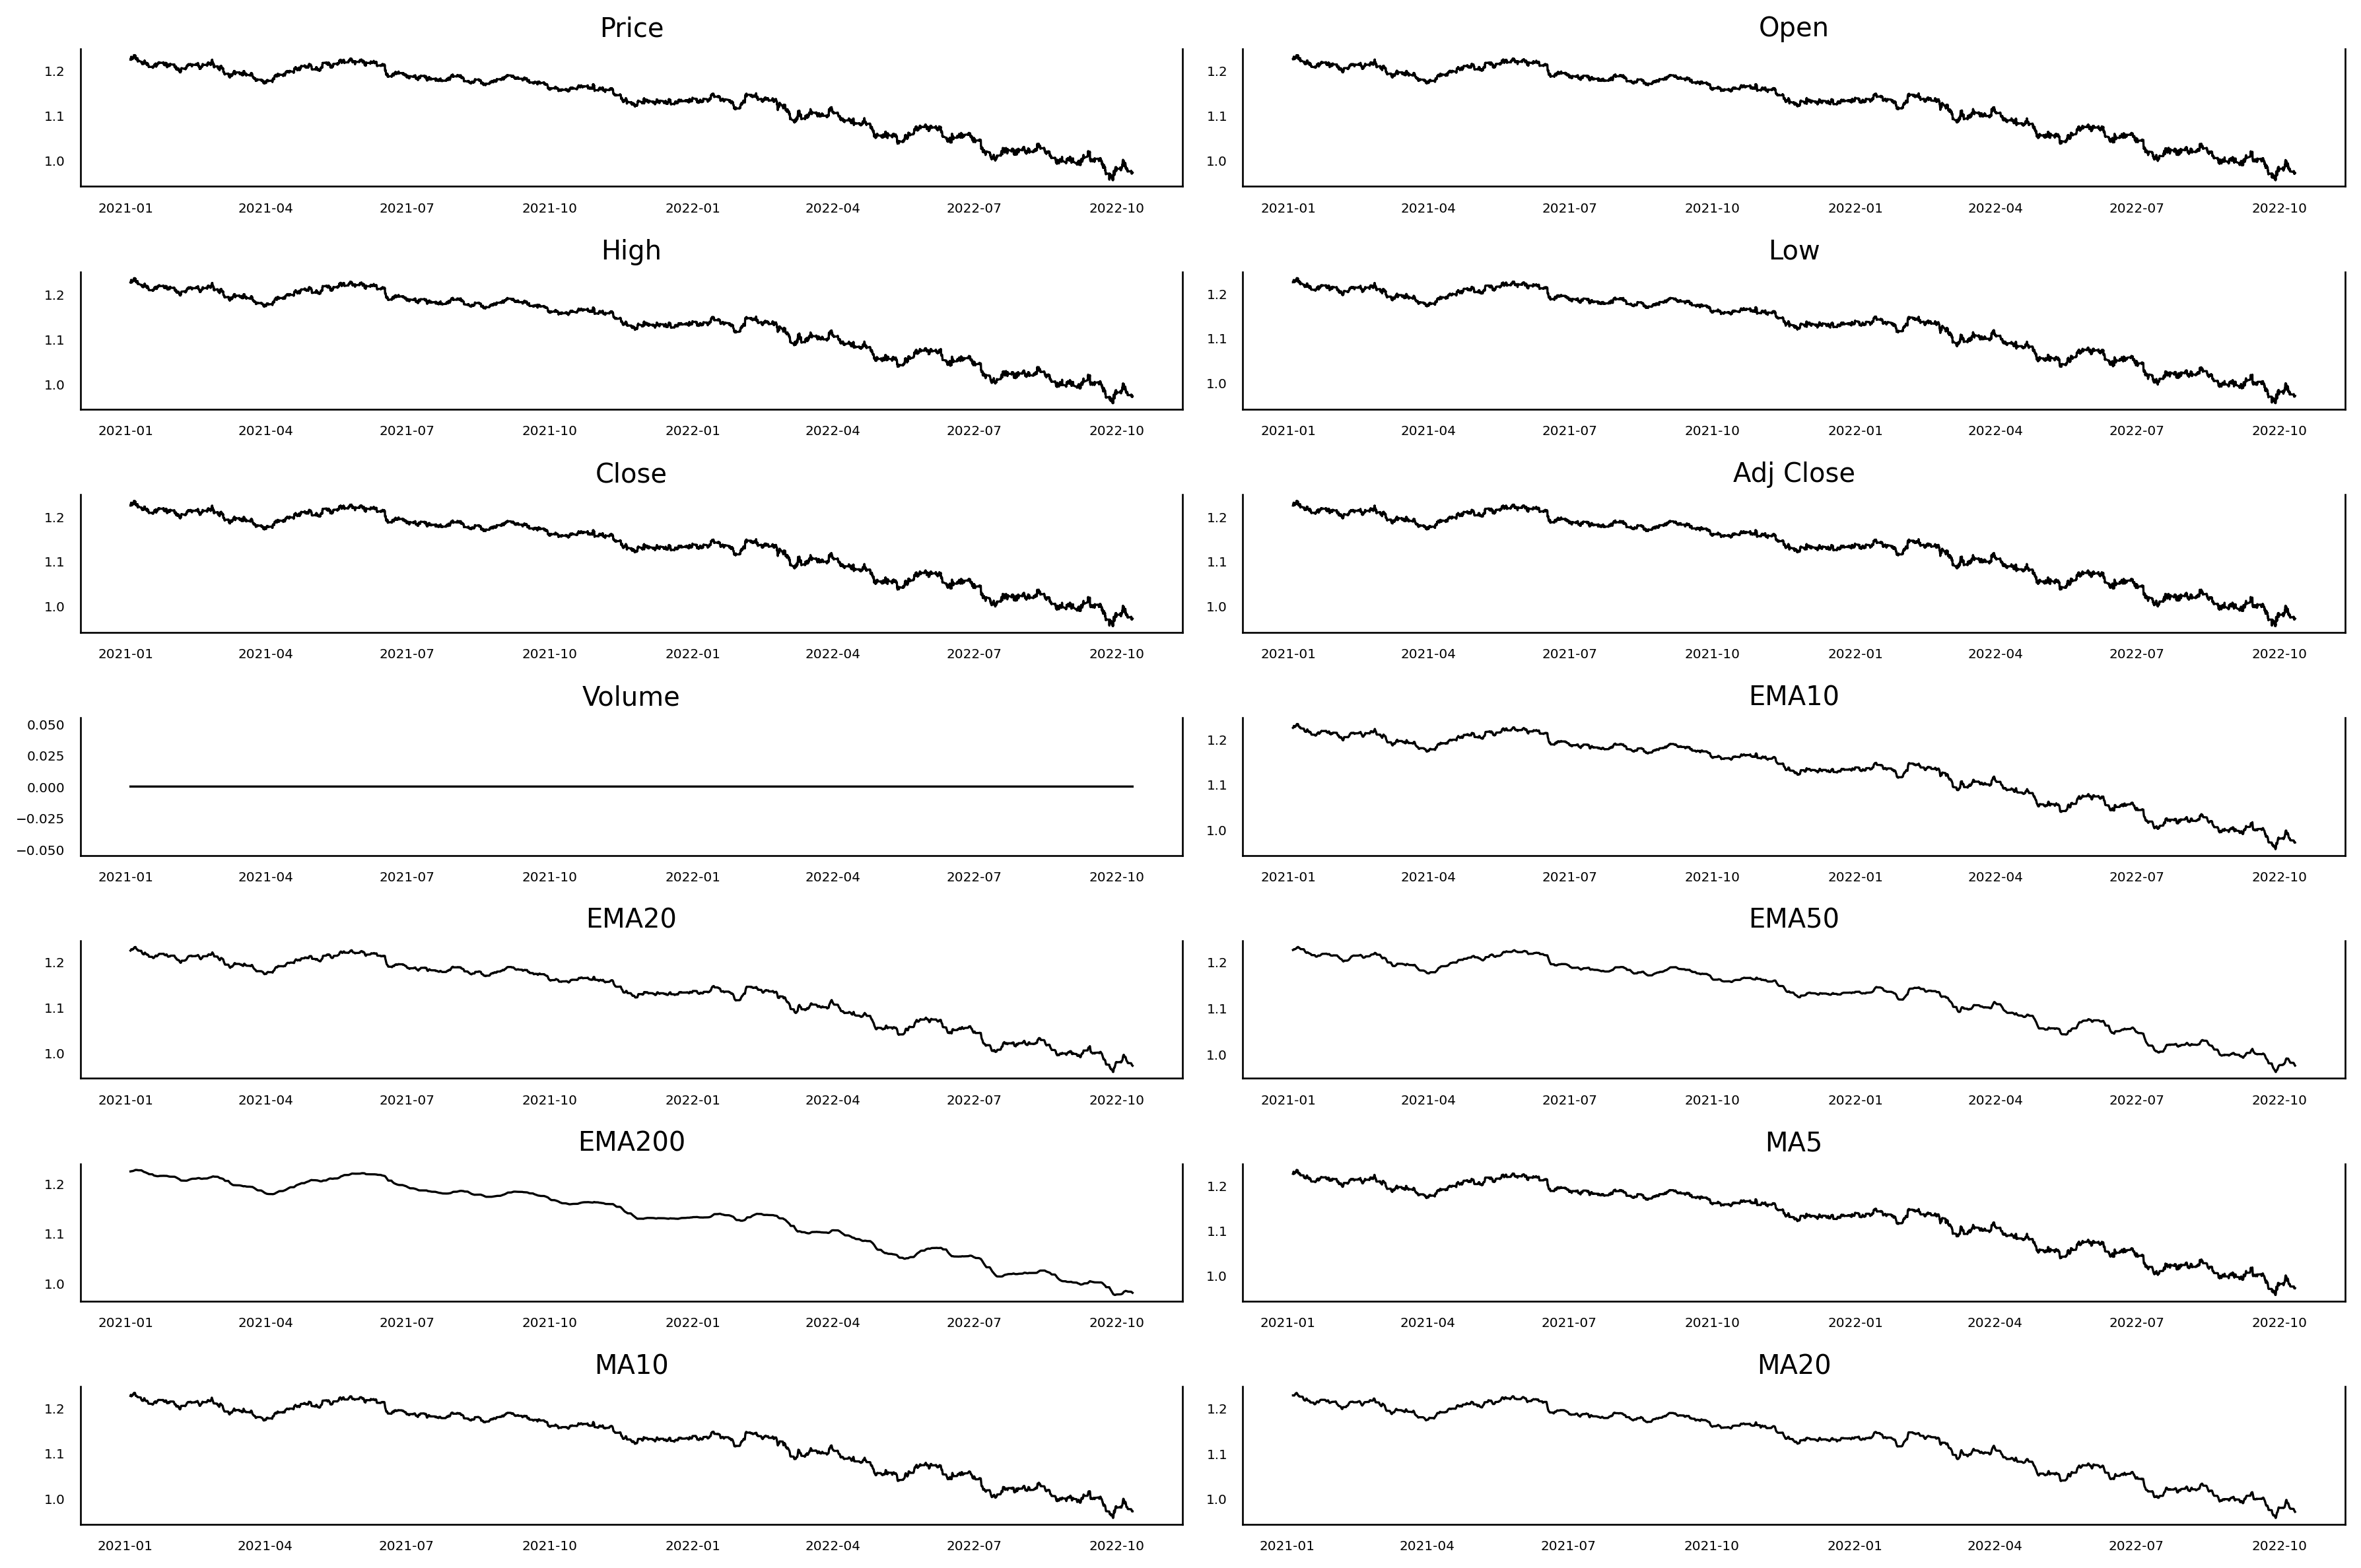

In [266]:
fig, axes = plt.subplots(nrows=7, ncols=2, dpi=240, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    data.index = date_time
    ax.plot(data, color='black', linewidth=1)
    
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

### Let's Explore the Data

In [267]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,10966.0,1.130349,0.072108,0.954290,1.072731,1.143380,1.188778,1.234568
Open,10966.0,1.130361,0.072086,0.954745,1.072846,1.143445,1.188778,1.234263
High,10966.0,1.131144,0.071982,0.956389,1.073653,1.144099,1.189450,1.235483
Low,10966.0,1.129681,0.072232,0.954107,1.071926,1.142727,1.188213,1.233806
Close,10966.0,1.130349,0.072108,0.954290,1.072731,1.143380,1.188778,1.234568
Adj Close,10966.0,1.130349,0.072108,0.954290,1.072731,1.143380,1.188778,1.234568
Volume,10966.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EMA10,10966.0,1.130453,0.072041,0.956361,1.072608,1.143268,1.188728,1.232971
EMA20,10966.0,1.130568,0.071970,0.957711,1.072857,1.143076,1.188518,1.232439
EMA50,10966.0,1.130906,0.071770,0.961279,1.072449,1.142689,1.189391,1.230958


In [268]:
df = df.drop('Volume', axis=1)
df = df.drop('Adj Close', axis=1)

In [269]:
df

,Price,Open,High,Low,Close,EMA10,EMA20,EMA50,EMA200,MA5,MA10,MA20,MA50,MA200
2021-01-04 00:00:00+00:00,1.224440,1.225190,1.225640,1.224440,1.224440,1.224440,1.224440,1.224440,1.224440,NaN,NaN,NaN,NaN,NaN
2021-01-04 01:00:00+00:00,1.225640,1.224590,1.225941,1.224440,1.225640,1.224658,1.224554,1.224487,1.224452,NaN,NaN,NaN,NaN,NaN
2021-01-04 02:00:00+00:00,1.225941,1.225640,1.226392,1.225340,1.225941,1.224891,1.224686,1.224544,1.224467,NaN,NaN,NaN,NaN,NaN
2021-01-04 03:00:00+00:00,1.225791,1.226091,1.226392,1.225340,1.225791,1.225055,1.224791,1.224593,1.224480,NaN,NaN,NaN,NaN,NaN
2021-01-04 04:00:00+00:00,1.225190,1.225640,1.226091,1.224890,1.225190,1.225079,1.224829,1.224616,1.224487,1.225400,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10 19:00:00+01:00,0.970591,0.971912,0.972479,0.970591,0.970591,0.970819,0.971920,0.975844,0.980542,0.970535,0.970488,0.971750,0.975811,0.980820
2022-10-10 20:00:00+01:00,0.970403,0.970968,0.971062,0.970403,0.970403,0.970744,0.971775,0.975630,0.980441,0.970516,0.970431,0.971580,0.975613,0.980899
2022-10-10 21:00:00+01:00,0.970591,0.970591,0.971157,0.970591,0.970591,0.970716,0.971663,0.975433,0.980343,0.970516,0.970544,0.971410,0.975388,0.980963
2022-10-10 22:00:00+01:00,0.970685,0.969838,0.970968,0.969838,0.970685,0.970710,0.971570,0.975247,0.980247,0.970761,0.970620,0.971178,0.975205,0.981032


In [270]:
df.shape

(10966, 14)

In [271]:
df = df.dropna()
df.shape

(10767, 14)

In [272]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,10767.0,1.128621,0.071628,0.954290,1.071811,1.140641,1.187507,1.226693
Open,10767.0,1.128633,0.071605,0.954745,1.071811,1.140511,1.187507,1.226392
High,10767.0,1.129415,0.071496,0.956389,1.072501,1.141422,1.188072,1.226994
Low,10767.0,1.127955,0.071757,0.954107,1.071008,1.139601,1.187014,1.226091
Close,10767.0,1.128621,0.071628,0.954290,1.071811,1.140641,1.187507,1.226693
EMA10,10767.0,1.128724,0.071557,0.956361,1.072182,1.140818,1.187444,1.225697
EMA20,10767.0,1.128838,0.071483,0.957711,1.071777,1.140955,1.187509,1.225251
EMA50,10767.0,1.129173,0.071276,0.961279,1.071424,1.140933,1.187172,1.224042
EMA200,10767.0,1.130853,0.070334,0.975754,1.070212,1.138421,1.186734,1.221576
MA5,10767.0,1.128667,0.071598,0.955421,1.071950,1.140928,1.187451,1.225971


### Feature Engineering

In [273]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

# Using Class Presentation Data

# NOTE: POWER DATA IS NOT COMPATIBLE WITH MODEL CREATED IN THE PRESENTATION, FURTHER STUDY IS NEEDED

In [93]:
# Path of the dataset
filepath = os.path.join(os.path.expanduser("~"), "Documents/CNN/household_power_consumption.txt.zip")

#DATA_PATH = "./data/household_power_consumption.txt.zip"
DATA_PATH = filepath


In [94]:
raw_csv_data = pd.read_csv(filepath,
                                 sep=';',
                                 parse_dates={'dt': ['Date', 'Time']},
                                 infer_datetime_format=True,
                                 low_memory=False,
                                 na_values=['nan', '?'],
                                 index_col='dt')

In [95]:
df = raw_csv_data

In [96]:
df= df.rename(columns={'Global_active_power':'Price'})

In [97]:
df = df.drop('Sub_metering_1', axis=1)
df = df.drop('Sub_metering_2', axis=1)
df = df.drop('Sub_metering_3', axis=1)

In [98]:
df

,Price,Global_reactive_power,Voltage,Global_intensity
dt,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4
2006-12-16 17:25:00,5.360,0.436,233.63,23.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8
...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8


### Split the data

In [99]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)

train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

print(f'There are {num_features} features')

There are 4 features


### Normalize the data

In [100]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

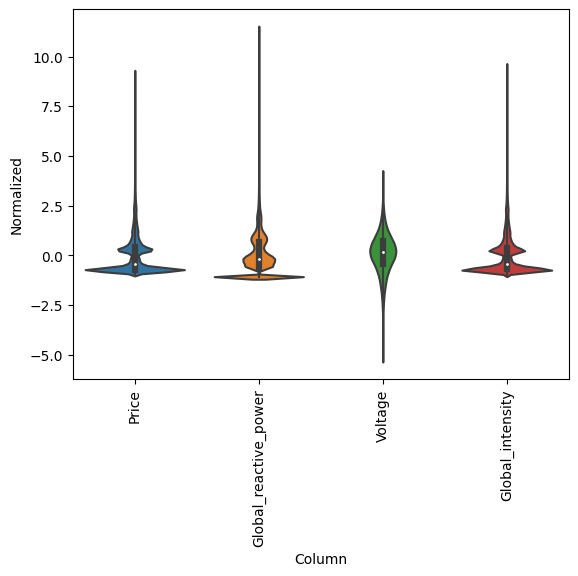

In [101]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Data Windowing

In [102]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, 
                 train_df=train_df, val_df=val_df, test_df=test_df, 
                 label_columns=None):
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'
        ])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col='Price', max_subplots=3):
        inputs, labels = self.example
        
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )
        
        ds = ds.map(self.split_window)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.train))
            self._example = result
        return result

In [103]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=3):
    early_stopping = EarlyStopping(monitor='val_loss', 
                                   patience=patience, 
                                   mode='min')
    
    model.compile(loss=MeanSquaredError(), 
                  optimizer=Adam(), 
                  metrics=[MeanAbsoluteError()])
    
    history = model.fit(window.train,
                       epochs=MAX_EPOCHS,
                       validation_data=window.val,
                       callbacks=[early_stopping])
    
    return history

### Single Step Models
<br>
Predicting only next one step, in this case the next hour

In [104]:
single_step_window = WindowGenerator(input_width=1, 
                                     label_width=1, 
                                     shift=1, 
                                     label_columns=['Price'])

single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Price']

### Baseline

In [105]:
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:,:,tf.newaxis]

In [106]:
baseline = Baseline(label_index=column_indices['Price'])

baseline.compile(loss=MeanSquaredError(),
                metrics=[MeanAbsoluteError()])

In [107]:
# dictionary
val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

12971/12971 [==============================] - 12s 886us/step - loss: nan - mean_absolute_error: nan


In [108]:
#24 hours window

wide_window = WindowGenerator(input_width=24,
                             label_width=24,
                             shift=1,
                             label_columns=['Price'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Price']

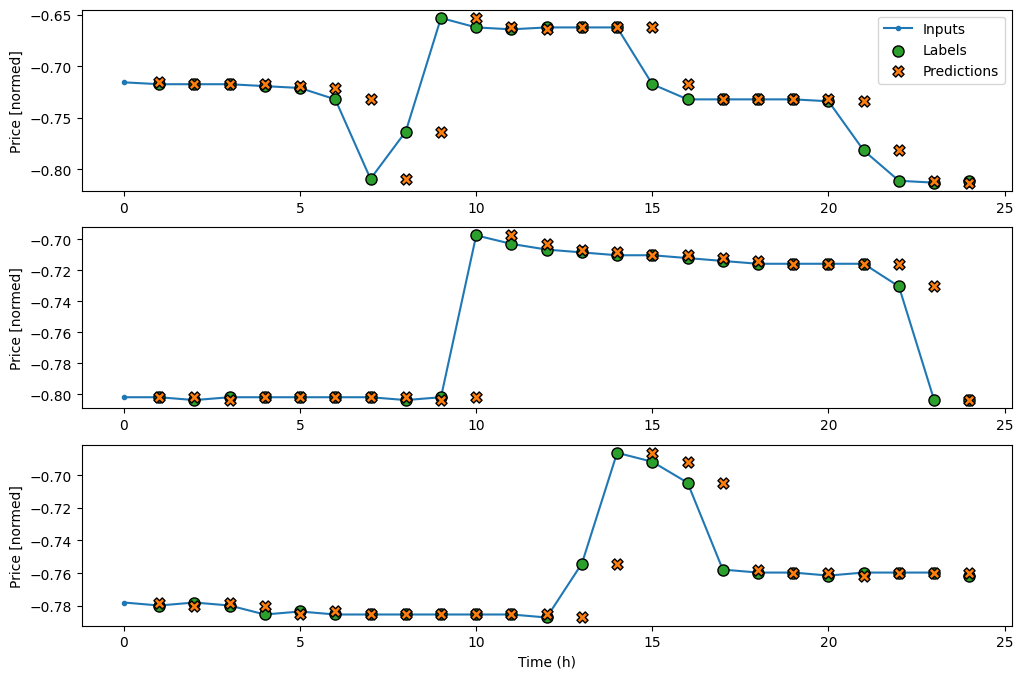

In [109]:
wide_window.plot(baseline)

### CNN

In [110]:
CONV_WIDTH = 3

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Price']
)

In [111]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Price'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Price']

In [112]:
cnn_model = Sequential([
    Conv1D(filters=32, 
           kernel_size=(CONV_WIDTH,), 
           activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

history = compile_and_fit(cnn_model, conv_window)

val_performance['CNN'] = cnn_model.evaluate(conv_window.val)
performance['CNN'] = cnn_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
45397/45397 [==============================] - 75s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/50
45397/45397 [==============================] - 85s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/50
12971/12971 [==============================] - 16s 1ms/step - loss: nan - mean_absolute_error: nan


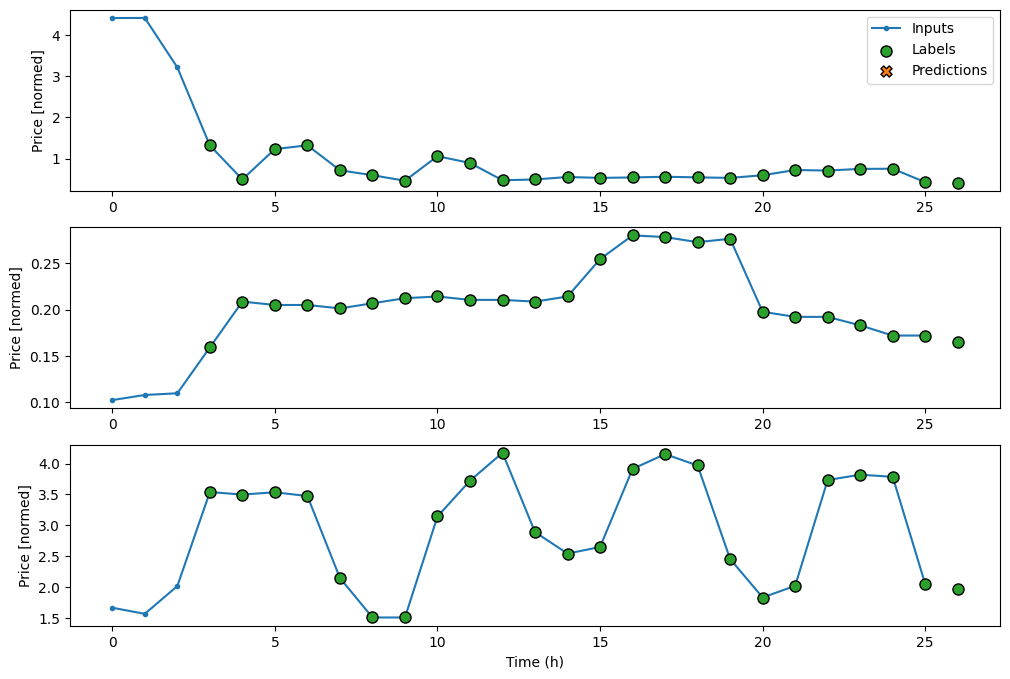

In [113]:
wide_conv_window.plot(cnn_model)

### LSTM

In [115]:
lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


Epoch 1/50
45396/45396 [==============================] - 419s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/50
45396/45396 [==============================] - 404s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/50
12970/12970 [==============================] - 37s 3ms/step - loss: nan - mean_absolute_error: nan


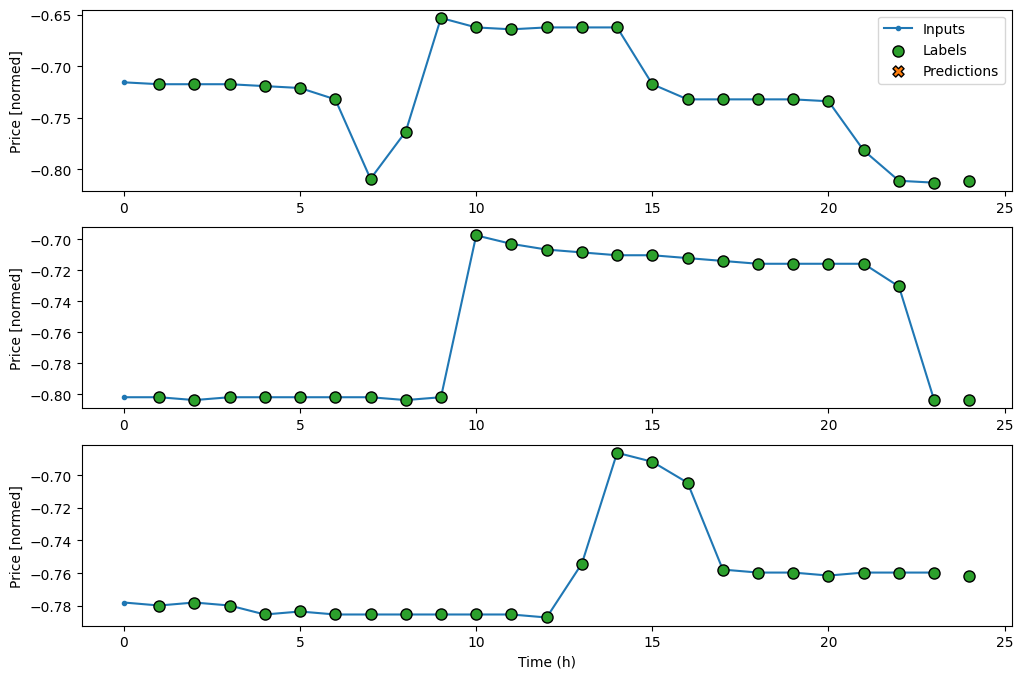

In [116]:
wide_window.plot(lstm_model)

### CNN+LSTM

In [ ]:
cnn_lstm_model = Sequential([
    Conv1D(filters=32, 
           kernel_size=(CONV_WIDTH,), 
           activation='relu'),
    LSTM(32, return_sequences=True),
    LSTM(32, return_sequences=True),
    Dense(1)
])

history = compile_and_fit(cnn_lstm_model, conv_window)

val_performance['CNN+LSTM'] = cnn_lstm_model.evaluate(conv_window.val)
performance['CNN+LSTM'] = cnn_lstm_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
45397/45397 [==============================] - 159s 3ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/50
29913/45397 [==================>...........] - ETA: 46s - loss: nan - mean_absolute_error: nan

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.legend(loc='best')
plt.show()

In [ ]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

## Multi Steps Model

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

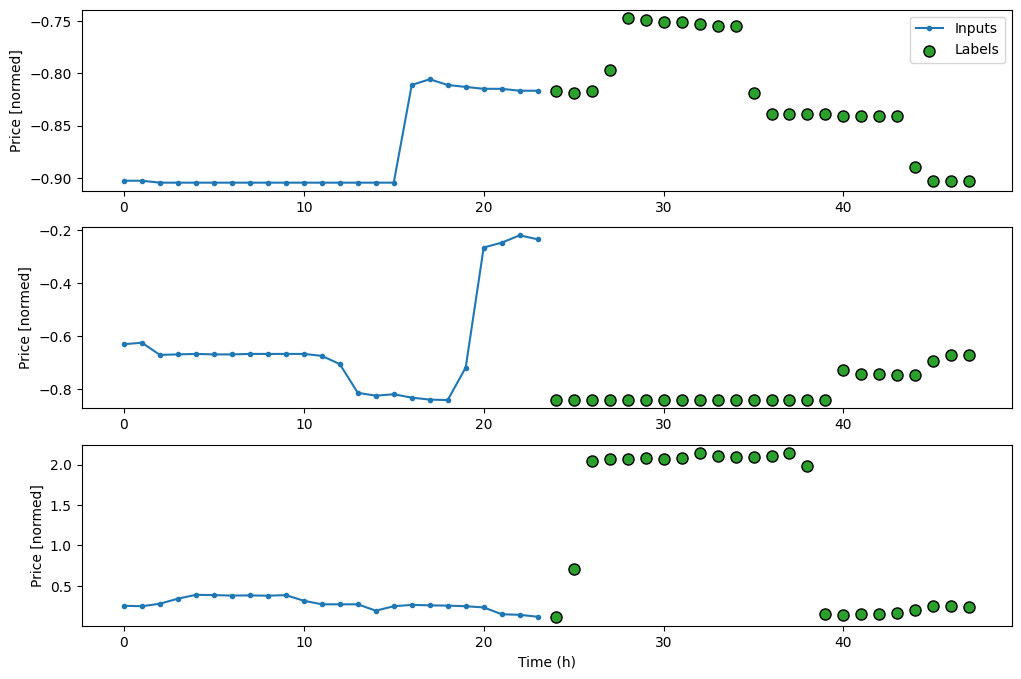

In [90]:
OUT_STEPS = 24

multi_window = WindowGenerator(input_width=24,
                              label_width=OUT_STEPS,
                              shift=OUT_STEPS)

multi_window.plot()
multi_window

### Baseline

In [91]:
class MultiStepLastBaseline(Model):
    def call(self, inputs):
        return tf.tile(inputs[:,-1:,:], [1, OUT_STEPS, 1])

In [92]:
last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=MeanSquaredError(),
                     metrics=[MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)

12969/12969 [==============================] - 14s 1ms/step - loss: nan - mean_absolute_error: nan


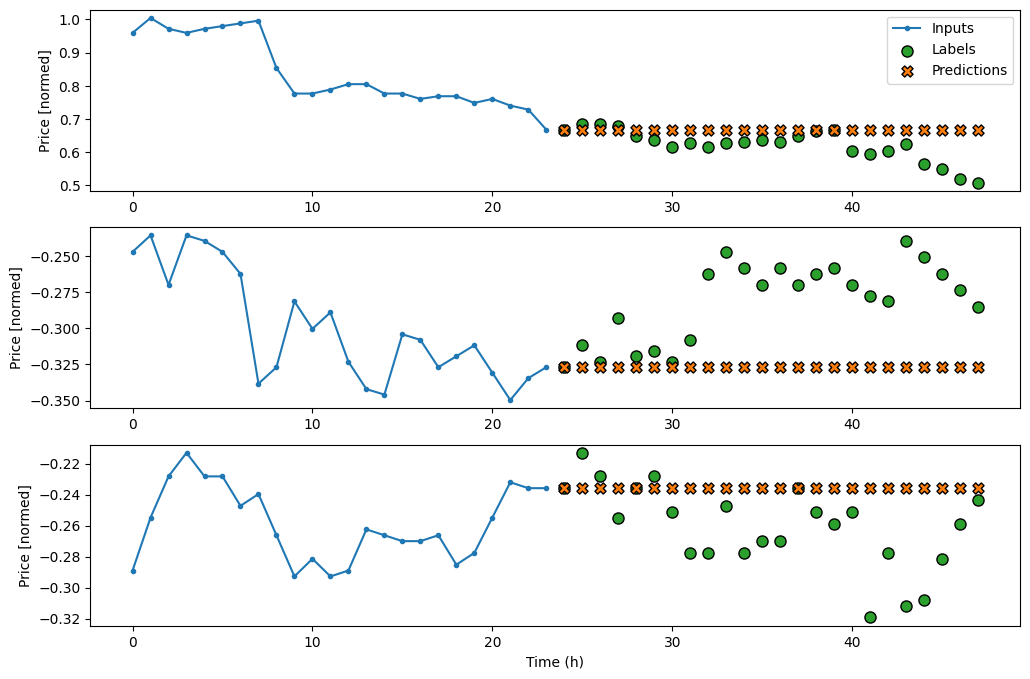

In [297]:
multi_window.plot(last_baseline)

In [298]:
class RepeatBaseline(Model):
    def call(self, inputs):
        return inputs

In [299]:

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=MeanSquaredError(),
                       metrics=[MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)

66/66 [==============================] - 0s 770us/step - loss: 0.0212 - mean_absolute_error: 0.1110


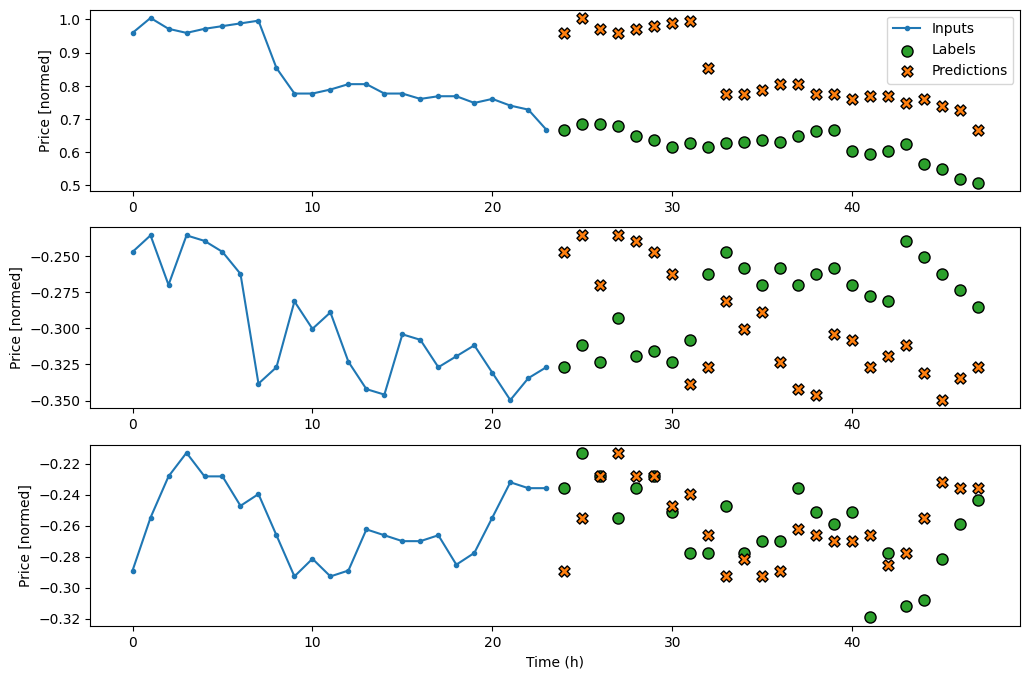

In [300]:

multi_window.plot(repeat_baseline)

### CNN

In [301]:
CONV_WIDTH = 3

multi_conv_model = Sequential([
    Lambda(lambda x: x[:, -CONV_WIDTH:, :]),         # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    Conv1D(256, 
           activation='relu', 
           kernel_size=(CONV_WIDTH)),                # Shape [batch, 1, conv_units]
    Dense(OUT_STEPS*num_features, 
          kernel_initializer=tf.initializers.zeros), #Shape [batch, 1, out_step*features]
    Reshape([OUT_STEPS, num_features])               #Shape [batch, out_steps, features]
])

history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)


Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0423 - mean_absolute_error: 0.1056 - val_loss: 0.0220 - val_mean_absolute_error: 0.1081
Epoch 2/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0074 - mean_absolute_error: 0.0602 - val_loss: 0.0233 - val_mean_absolute_error: 0.1217
Epoch 3/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0062 - mean_absolute_error: 0.0539 - val_loss: 0.0212 - val_mean_absolute_error: 0.1183
Epoch 4/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0056 - mean_absolute_error: 0.0502 - val_loss: 0.0152 - val_mean_absolute_error: 0.0922
Epoch 5/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0055 - mean_absolute_error: 0.0492 - val_loss: 0.0238 - val_mean_absolute_error: 0.1256
Epoch 6/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0057 - mean_absolute_error: 0.0504 - val_loss: 0.0133 - val_mean_absolute_error: 0.0829
Epoch 7/50
235/2

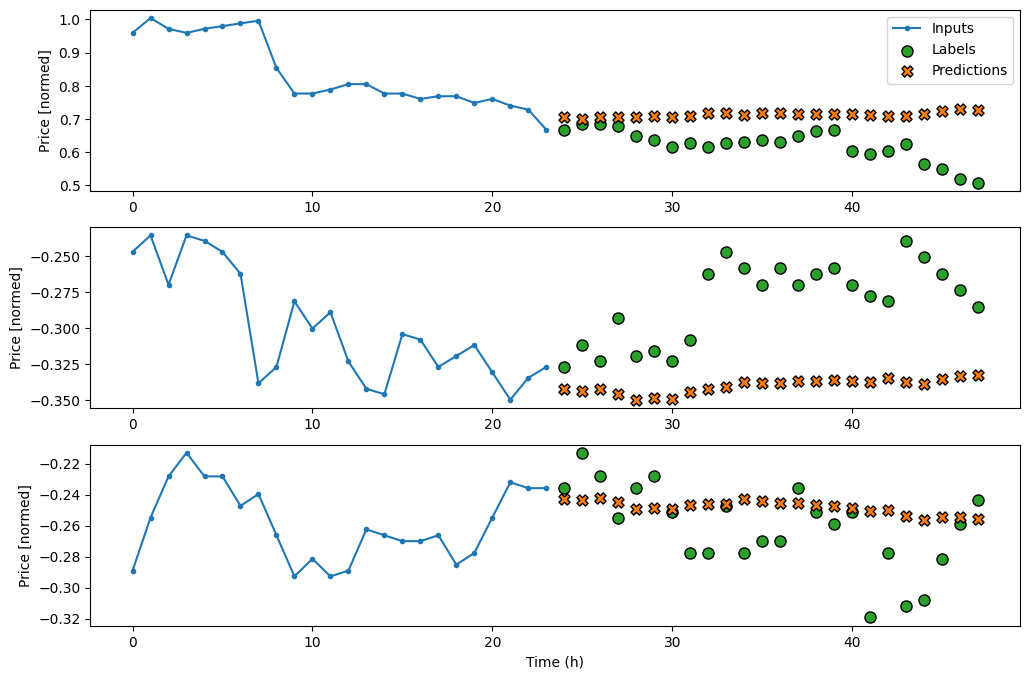

In [302]:
multi_window.plot(multi_conv_model)


### LSTM

In [303]:
multi_lstm_model = Sequential([
    LSTM(32, return_sequences=False),
    Dense(OUT_STEPS*num_features,
          kernel_initializer=tf.initializers.zeros),
    Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)


multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.1330 - mean_absolute_error: 0.2088 - val_loss: 2.4826 - val_mean_absolute_error: 1.4084
Epoch 2/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0680 - val_loss: 2.1495 - val_mean_absolute_error: 1.2863
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0631 - val_loss: 1.9891 - val_mean_absolute_error: 1.2221
Epoch 4/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0566 - val_loss: 1.9240 - val_mean_absolute_error: 1.2022
Epoch 5/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0518 - val_loss: 1.8058 - val_mean_absolute_error: 1.1587
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0501 - val_loss: 1.7260 - val_mean_absolute_error: 1.1307
Epoch 7/50
235/2

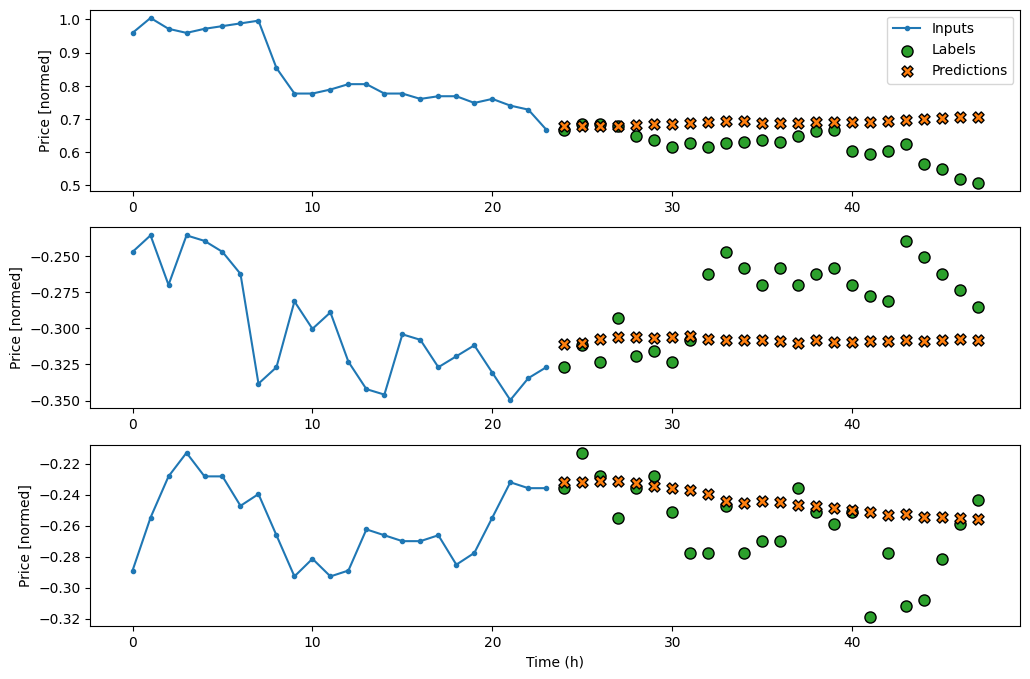

In [304]:
multi_window.plot(multi_lstm_model)

### CNN+LSTM

In [305]:
CONV_WIDTH = 3

multi_conv_model = Sequential([
    Lambda(lambda x: x[:, -CONV_WIDTH:, :]),         # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    Conv1D(256, 
           activation='relu', 
           kernel_size=(CONV_WIDTH)),                # Shape [batch, 1, conv_units]
    LSTM(32, return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(OUT_STEPS*num_features, 
          kernel_initializer=tf.initializers.zeros), #Shape [batch, 1, out_step*features]
    Reshape([OUT_STEPS, num_features])               #Shape [batch, out_steps, features]
])

history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance['CNN+LSTM'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['CNN+LSTM'] = multi_conv_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.2224 - mean_absolute_error: 0.2858 - val_loss: 2.3171 - val_mean_absolute_error: 1.3733
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0109 - mean_absolute_error: 0.0752 - val_loss: 1.5976 - val_mean_absolute_error: 1.1024
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0094 - mean_absolute_error: 0.0696 - val_loss: 1.4069 - val_mean_absolute_error: 1.0286
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0090 - mean_absolute_error: 0.0677 - val_loss: 1.1703 - val_mean_absolute_error: 0.8985
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0090 - mean_absolute_error: 0.0673 - val_loss: 1.1754 - val_mean_absolute_error: 0.9257
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0086 - mean_absolute_error: 0.0657 - val_loss: 1.1257 - val_mean_absolute_error: 0.9085
Epoch 7/50
235/2

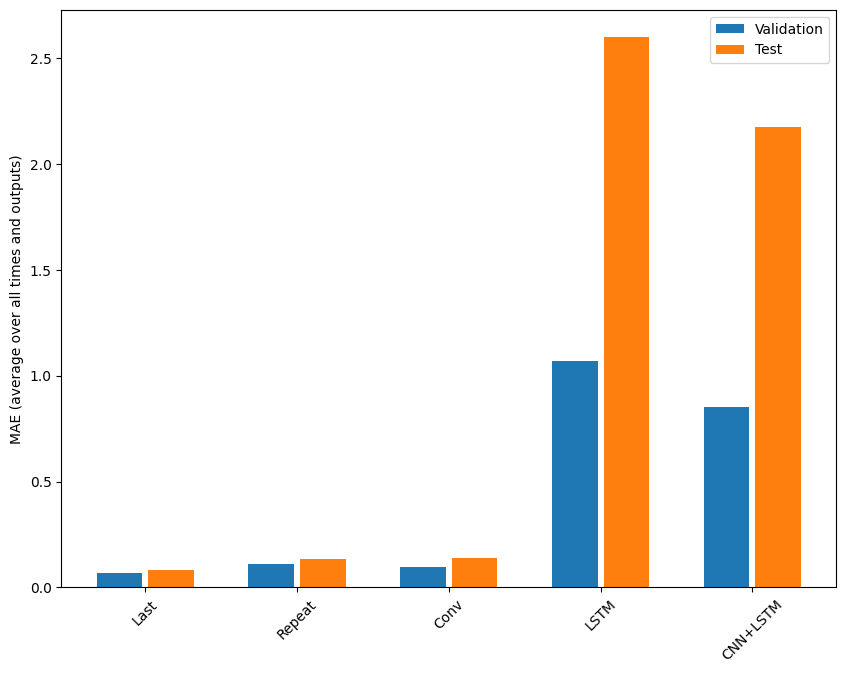

In [306]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
plt.legend(loc='best')
plt.show()

In [307]:
for name, value in multi_performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Last        : 0.0835
Repeat      : 0.1328
Conv        : 0.1412
LSTM        : 2.5991
CNN+LSTM    : 2.1778


### Summary

In this study you have seen an example of CNN using both 1D and 2D model to predict a EUR/USD trade pattern.

### Links and References

https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
https://poloclub.github.io/cnn-explainer/
<br>
https://arxiv.org/pdf/1603.07285.pdf


